Rupesh Bharambe (AI3107)

In [8]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [18]:
# Set the dataset paths
train_dir = "VegetableDataset/train"
valid_dir = "VegetableDataset/validation"
test_dir = "VegetableDataset/test"

In [19]:
IMG_SIZE = 224

In [20]:
def load_data_from_directory(directory):
    data = []
    labels = []
    classes = sorted(os.listdir(directory))

    for class_name in classes:
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            continue
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                image = cv2.imread(img_path)
                image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
                image = image.astype("float32") / 255.0  # Normalize
                data.append(image)
                labels.append(class_name)
            except:
                print(f"Error loading image: {img_path}")
    
    return np.array(data), np.array(labels)

# Load all sets
trainX, trainY = load_data_from_directory(train_dir)
validX, validY = load_data_from_directory(valid_dir)
testX, testY = load_data_from_directory(test_dir)

Error loading image: VegetableDataset/train\bell pepper\Image_56.jpg


In [21]:
# Encode class labels
le = LabelEncoder()
trainY = to_categorical(le.fit_transform(trainY))
validY = to_categorical(le.transform(validY))
testY = to_categorical(le.transform(testY))

print("Train:", trainX.shape, trainY.shape)
print("Validation:", validX.shape, validY.shape)
print("Test:", testX.shape, testY.shape)

Train: (3070, 224, 224, 3) (3070, 36)
Validation: (351, 224, 224, 3) (351, 36)
Test: (359, 224, 224, 3) (359, 36)


In [22]:
# Build the custom CNN model
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dense(trainY.shape[1], activation="softmax"))

C:\Users\rupes\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile the model
print("[INFO] compiling model...")
opt = Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


[INFO] compiling model...


In [24]:
# Train the model
print("[INFO] training model...")
H = model.fit(trainX, trainY,
              validation_data=(validX, validY),
              epochs=10,
              batch_size=32,
              verbose=1)


[INFO] training model...
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 735ms/step - accuracy: 0.0866 - loss: 3.6591 - val_accuracy: 0.3134 - val_loss: 2.1959
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 68s 702ms/step - accuracy: 0.3015 - loss: 2.4255 - val_accuracy: 0.5840 - val_loss: 1.5126
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 66s 686ms/step - accuracy: 0.4782 - loss: 1.7790 - val_accuracy: 0.8034 - val_loss: 0.7745
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 69s 715ms/step - accuracy: 0.6880 - loss: 1.0140 - val_accuracy: 0.9031 - val_loss: 0.4569
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 680ms/step - accuracy: 0.8856 - loss: 0.4100 - val_accuracy: 0.9373 - val_loss: 0.3274
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 67s 698ms/step - accuracy: 0.9490 - loss: 0.2146 - val_accuracy: 0.9516 - val_loss: 0.2681
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 66s 684ms/step - accuracy: 0.9792 - loss: 0.1004 - val_accuracy: 0.9544 - val_loss: 0.2686
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 678ms/step - accuracy: 0.9841 

In [25]:
# Evaluate the model
print("[INFO] evaluating model...")
loss, acc = model.evaluate(testX, testY, verbose=0)
print(f"Test Accuracy: {acc * 100:.2f}%")


[INFO] evaluating model...
Test Accuracy: 94.71%


In [26]:
# Prediction example
sample = np.expand_dims(testX[0], axis=0)
pred = model.predict(sample)
predicted_index = np.argmax(pred)
actual_index = np.argmax(testY[0])

print(f"Predicted class: {le.classes_[predicted_index]}")
print(f"Actual class: {le.classes_[actual_index]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted class: apple
Actual class: apple


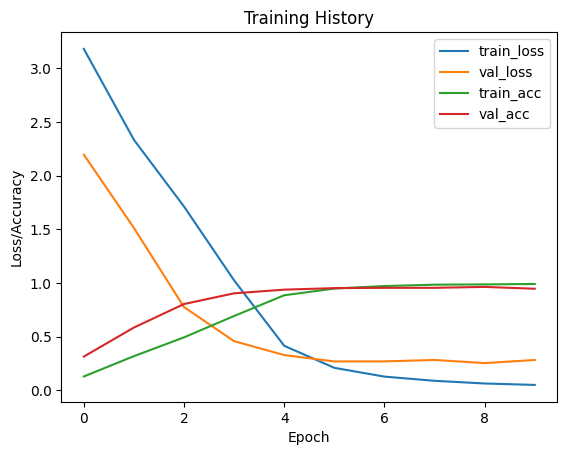

In [27]:
#plot training history
plt.plot(H.history["loss"], label="train_loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.plot(H.history["accuracy"], label="train_acc")
plt.plot(H.history["val_accuracy"], label="val_acc")
plt.title("Training History")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
